In [4]:
# Setup Env 
# conda create -n titanicsurvivalprediction python=3.8
#conda activate titanicsurvivalprediction

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('train.csv',na_values='NA')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
dataset=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [10]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [11]:
print(dataset['Sex'].unique())
print(dataset['Parch'].unique())
print(dataset['Embarked'].unique())
print(dataset['Cabin'].unique())

['male' 'female']
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42'

In [12]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
len(dataset)

891

In [14]:
dataset['Cabin'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\2063801995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cabin'].fillna('Unknown',inplace=True)


In [15]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [16]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [17]:
dataset.loc[dataset['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,8.4583,Unknown,Q
17,1,2,male,NaN,0,0,13.0000,Unknown,S
19,1,3,female,NaN,0,0,7.2250,Unknown,C
26,0,3,male,NaN,0,0,7.2250,Unknown,C
28,1,3,female,NaN,0,0,7.8792,Unknown,Q


In [18]:
mean_Adult=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']==0) & (df['Parch']==0),'Age'].mean()
mean_Child=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']>0) | (df['Parch']>0),'Age'].mean()

In [19]:
print("Mean of Adult is {} and Child is {}".format(mean_Adult,mean_Child))

Mean of Adult is 32.22029702970297 and Child is 26.413451612903227


In [20]:
dataset.loc[df['Age'].isnull() & (df['SibSp']==0) & (df['Parch']==0),'Age']=mean_Adult

In [21]:
dataset.loc[df['Age'].isnull() & (df['SibSp']>0) | (df['Parch']>0),'Age']=mean_Child

In [22]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [23]:
len(dataset)

891

In [24]:
dataset['Embarked'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\2918969670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked'].fillna('Unknown',inplace=True)


In [25]:
len(dataset)

891

In [26]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [27]:
dataset.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035562,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.291553,0.083081,0.018443,-0.549500
Age,-0.035562,-0.291553,1.000000,-0.125673,-0.202023,0.017925
SibSp,-0.035322,0.083081,-0.125673,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.202023,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.017925,0.159651,0.216225,1.000000


In [28]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [29]:
unique_Sex=list(dataset['Sex'].unique())
unique_Cabin=list(dataset['Cabin'].unique())
unique_Embarked=list(dataset['Embarked'].unique())


In [30]:
dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))
dataset['Cabin']=dataset['Cabin'].map(lambda x : unique_Cabin.index(x))
dataset['Embarked']=dataset['Embarked'].map(lambda x : unique_Embarked.index(x))


C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\4160880178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\4160880178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cabin']=dataset['Cabin'].map(lambda x : unique_Cabin.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\4160880178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [31]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\1284407741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\1284407741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['SibSp','Parch'],axis=1,inplace=True)


In [32]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [33]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,22.0,7.2500,0,0,2
1,1,1,38.0,71.2833,1,1,2
2,3,1,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,2,0,2
4,3,0,35.0,8.0500,0,0,1


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [38]:
print("Length of X train {} X test {}  Y train  {}  Y test {} ".format(len(x_train),len(x_test),len(y_train),len(y_test)))

Length of X train 757 X test 134  Y train  757  Y test 134 


In [39]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[0.09795738 0.31294865 0.16526928 0.2365745  0.0803866  0.03901918
 0.0678444 ]


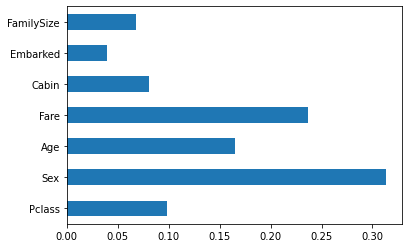

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.plot(kind='barh')
plt.show()

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model(train_data_X,train_data_y):
    
    model = Sequential()
    model.add(Dense(256, input_shape=(len(train_data_X.columns),), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(56, activation='relu'))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [43]:
base_model=model(x_train,y_train)

In [45]:
base_model.fit(x_train,y_train,epochs=1000,batch_size=30)

Epoch 1/1000
26/26 [==============================] - 2s 4ms/step - loss: 0.6603 - accuracy: 0.6341
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6658
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.6460
Epoch 4/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6711
Epoch 5/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6737
Epoch 6/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7081
Epoch 7/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6684
Epoch 8/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6777
Epoch 9/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.6882
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.6922

26/26 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8217
Epoch 83/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3882 - accuracy: 0.8283
Epoch 84/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8269
Epoch 85/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8230
Epoch 86/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8322
Epoch 87/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8243
Epoch 88/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8269
Epoch 89/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8283
Epoch 90/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8190
Epoch 91/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8230
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8600
Epoch 163/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8587
Epoch 164/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8613
Epoch 165/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8600
Epoch 166/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8507
Epoch 167/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8587
Epoch 168/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8666
Epoch 169/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8600
Epoch 170/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8626
Epoch 171/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8666
Epoch 243/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8705
Epoch 244/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8771
Epoch 245/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8771
Epoch 246/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8626
Epoch 247/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8771
Epoch 248/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8653
Epoch 249/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8771
Epoch 250/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8785
Epoch 251/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.

26/26 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8824
Epoch 323/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8851
Epoch 324/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.8838
Epoch 325/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8758
Epoch 326/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8719
Epoch 327/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8771
Epoch 328/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.8943
Epoch 329/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8639
Epoch 330/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8877
Epoch 331/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8798
Epoch 403/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8758
Epoch 404/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8970
Epoch 405/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8798
Epoch 406/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8824
Epoch 407/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8838
Epoch 408/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2772 - accuracy: 0.8851
Epoch 409/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8864
Epoch 410/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8864
Epoch 411/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8890
Epoch 483/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8864
Epoch 484/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8917
Epoch 485/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8904
Epoch 486/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.8877
Epoch 487/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8798
Epoch 488/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2626 - accuracy: 0.8877
Epoch 489/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9022
Epoch 490/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8996
Epoch 491/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8970
Epoch 563/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8970
Epoch 564/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8877
Epoch 565/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8904
Epoch 566/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8798
Epoch 567/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8904
Epoch 568/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8943
Epoch 569/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8824
Epoch 570/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9049
Epoch 571/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8943
Epoch 643/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8917
Epoch 644/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8983
Epoch 645/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8917
Epoch 646/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8943
Epoch 647/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.8864
Epoch 648/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8771
Epoch 649/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.8956
Epoch 650/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8970
Epoch 651/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8864
Epoch 723/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.8838
Epoch 724/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.8851
Epoch 725/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8970
Epoch 726/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8904
Epoch 727/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2510 - accuracy: 0.8996
Epoch 728/1000
26/26 [==============================] - 0s 2ms/step - loss: 1.0831 - accuracy: 0.8745
Epoch 729/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2858 - accuracy: 0.8917
Epoch 730/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9089
Epoch 731/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.9141
Epoch 803/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.9194
Epoch 804/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8996
Epoch 805/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2356 - accuracy: 0.9062
Epoch 806/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9009
Epoch 807/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9009
Epoch 808/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8970
Epoch 809/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.9009
Epoch 810/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8996
Epoch 811/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.8983
Epoch 883/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.8970
Epoch 884/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8851
Epoch 885/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9234
Epoch 886/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9009
Epoch 887/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.9009
Epoch 888/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9009
Epoch 889/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9049
Epoch 890/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9075
Epoch 891/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.

26/26 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9009
Epoch 963/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.9155
Epoch 964/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2438 - accuracy: 0.9075
Epoch 965/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.9022
Epoch 966/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9089
Epoch 967/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9102
Epoch 968/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8930
Epoch 969/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2107 - accuracy: 0.9168
Epoch 970/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9049
Epoch 971/1000
26/26 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.

In [46]:
base_model.save('Titanicmodel_Feature _Engineering.h5')

# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

In [47]:
test_data=pd.read_csv('test.csv')
res_data=test_data

In [48]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
test_data=test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare', 'Cabin', 'Embarked']]

In [51]:
test_data.isnull().sum()
test_data['Cabin'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\656902632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin'].fillna('Unknown',inplace=True)


In [52]:
test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
test_data['Cabin']=test_data['Cabin'].map(lambda x : unique_Cabin.index(x) if (unique_Cabin.count(x)>0) else unique_Cabin.index('Unknown'))
test_data['Embarked']=test_data['Embarked'].map(lambda x : unique_Embarked.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3119053988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3119053988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin']=test_data['Cabin'].map(lambda x : unique_Cabin.index(x) if (unique_Cabin.count(x)>0) else unique_Cabin.index('Unknown'))
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3119053988.py:3: SettingWithCopyWarnin

In [53]:

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,0,2
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,0


In [54]:
mean_Adult=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age'].mean()
mean_Child=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age'].mean()


test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age']=mean_Child
test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age']=mean_Adult

In [55]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [56]:
test_data.fillna(test_data['Fare'].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3019302626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(test_data['Fare'].mean(),inplace=True)


In [57]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [58]:
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3033433945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
C:\Users\Hp\AppData\Local\Temp\ipykernel_5000\3033433945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['SibSp','Parch'],axis=1,inplace=True)


In [61]:
predict_result=base_model.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [62]:
ans=[]
for i,j in zip(predict_result,list(res_data['PassengerId'])):
    if int(i) > 0:
        ans.append(1)
    elif int(i)<=0:
        ans.append(0)

In [63]:
df = pd.DataFrame({
                    'PassengerId': list(res_data['PassengerId']),
                    'Survived': list(ans) 
                  })

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('output_Random_CNN+Feature_Engineering.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='gender_submission', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()